### 1.Inspiration /Problem Statement:The goal is to use best Classification model to predict Whether the loan will be approved or not.

#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas_profiling as pp
sn.set()
RANDOM_SEED = 42

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from subprocess import check_output
from sklearn import metrics
import joblib
import pickle
import time
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler

In [2]:
import os
for dirname, _, filenames in os.walk('/Users/Zahed/Loan Application Status Prediction Project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/Zahed/Loan Application Status Prediction Project\loan_prediction.csv


### 2. Data Loading and Description

#### Importing Dataset

In [3]:
data = '/Users/Zahed/Loan Application Status Prediction Project\loan_prediction.csv'

df = pd.read_csv(data)

In [4]:
# settings to display all columns
pd.set_option("display.max_columns", None)
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [5]:
#Having a copy of Original Data Frame for Future Analysis Purpose
new_df=df

#### Dimensionality Check

In [6]:
df.shape

(614, 13)

#####   Observation:The dataset consist of 614 observations of 13 columns.

In [7]:
#Getting the datatypes of the columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Variables/Features of the Dataset

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### 3.Preprocessing data

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.isnull().values.any()

True

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Observation:There are Missing Values in (Gender,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History) columns of the dataset

#### Data Description

In [12]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

#### Oservation:Looking at the Count we can Confirm there are Missing rows in many columns, Also Maximum Loan Amount is 700 Where as Loan Amount is 9

In [13]:
# fill the missing values for the numerical terms-mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [14]:
# fill the missing values for the Categorical terms-mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
#Get the Count of Number of Approved and Not Approved Loan Status 
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

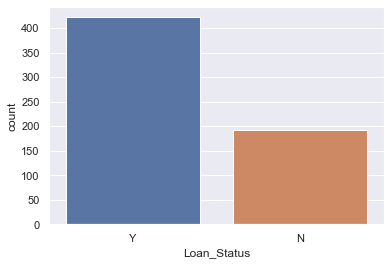

In [17]:
# Visualization of Count of Number of Approved and Not Approved Loan Status 
sn.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

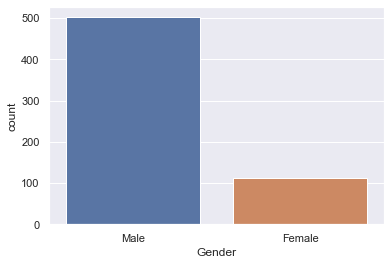

In [18]:
sn.countplot(df['Gender'])

#### Observation: Most of the Loan Applicants are Males

<AxesSubplot:xlabel='Dependents', ylabel='count'>

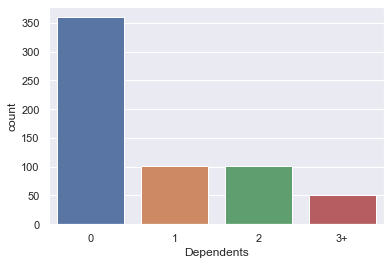

In [19]:
sn.countplot(df['Dependents'])

#### Observation: Majority of the loan applicants dont have dependents

<AxesSubplot:xlabel='Education', ylabel='count'>

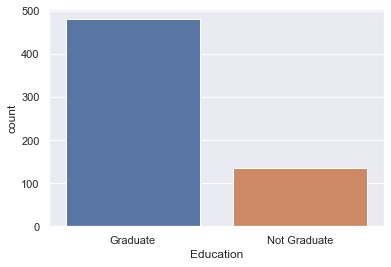

In [20]:
sn.countplot(df['Education'])

#### Observation:Most of the Loan Applicants are Graduates

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

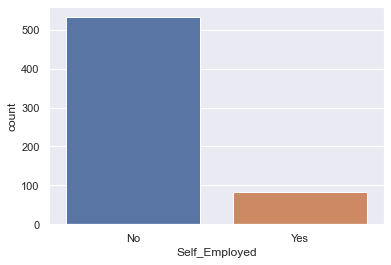

In [21]:
sn.countplot(df['Self_Employed'])

#### Observation:Very minimum of the Loan Applicants are self Employed. 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

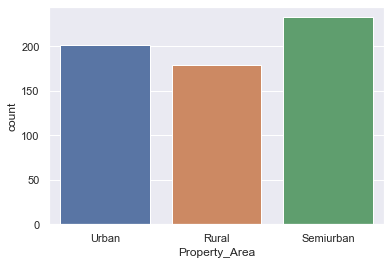

In [22]:
sn.countplot(df['Property_Area'])

#### Observation: We can see that majorly people who apply for loan are from semi-urban area.

In [23]:
# print all of the data types and their Unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column)+ ':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('---------------------------------------------------------------------------------------------')

Loan_ID:['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

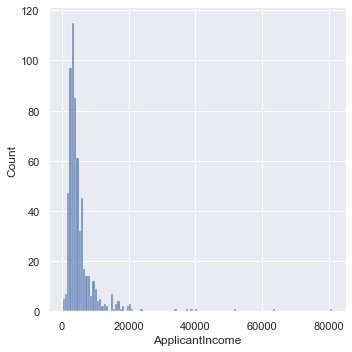

In [24]:
#Numerical data Visualisation
sn.displot(df['ApplicantIncome'])

#### Observation:We can see that the graph is slightly right skewed

In [25]:
#Applying Log Transformation to reduce the skewness
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'])

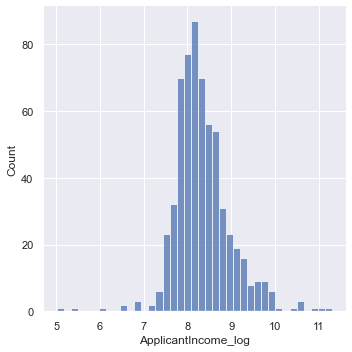

In [26]:
#Numerical data Visualisation post log transformation
sn.displot(df['ApplicantIncome_log'])

#### Observation:we can see that the graph is now distributed normally

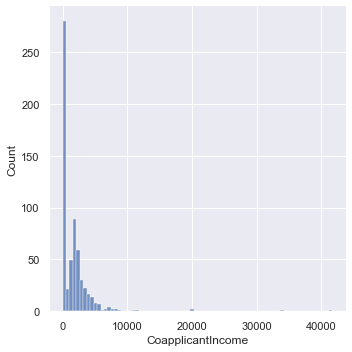

In [27]:
#Numerical data Visualisation
sn.displot(df['CoapplicantIncome'])

In [28]:
#Applying Log Transformation to reduce the skewness
df['CoapplicantIncome_log'] = np.log(df['CoapplicantIncome'])

#### Observation:we can see that the graph is now distributed normally

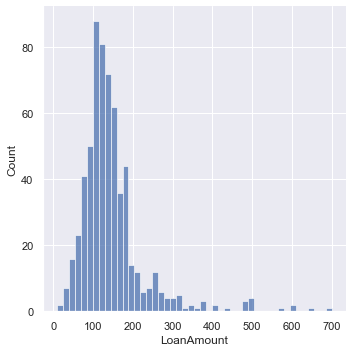

In [29]:
#Numerical data Visualisation
sn.displot(df['LoanAmount'])

In [30]:
#Applying Log Transformation to reduce the skewness
df['LoanAmount_log'] = np.log(df['LoanAmount'])

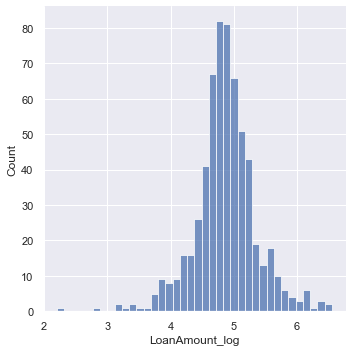

In [31]:
sn.displot(df['LoanAmount_log'])

#### Observation:we can see that the graph is now distributed normally

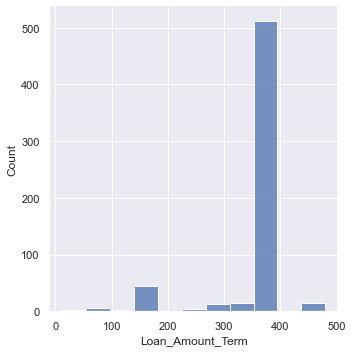

In [32]:
#Numerical data Visualisation
sn.displot(df['Loan_Amount_Term'])

In [33]:
#Applying Log Transformation to reduce the skewness
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'])

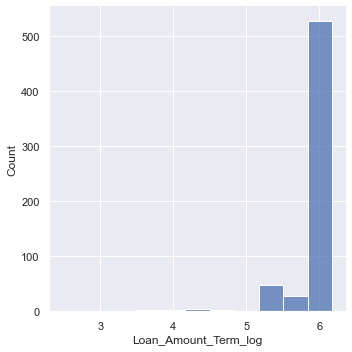

In [34]:
sn.displot(df['Loan_Amount_Term_log'])

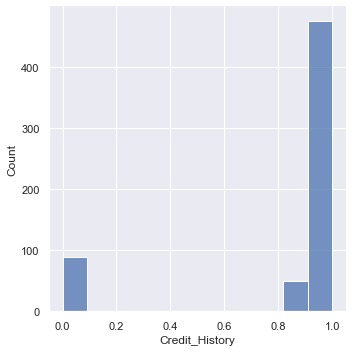

In [35]:
#Numerical data Visualisation
sn.displot(df['Credit_History'])

#### Observation:we can see that all the values are between 0 & 1 hence there is no need to apply any kind of transformation on it.


In [36]:
#Let's create a new feature called total income by adding both ApplicantIncome & CoApplicant income together
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  ApplicantIncome_log  \
0             1.0         Urban           Y             8.674026   
1             1.0         Rural           N             8.430109   
2             1.0         Urban           Y             8.006368   
3             1.0         Urban           Y             7.856707   
4             1.0         Urban           Y             8.699515   

   CoapplicantIncome_log  LoanAmount_log  Loan_Amount_Term_log  Total_Income  
0                   -inf        4.986426              5.886104        5849.0  
1               7.318540        4.852030              5.886104        6091.0  
2                   -inf        4.189655              5.886104        3000.0  
3               7.765569        4.787492              5.886104        4941.0  
4                   -inf        4.948760              5.886104        6000.0

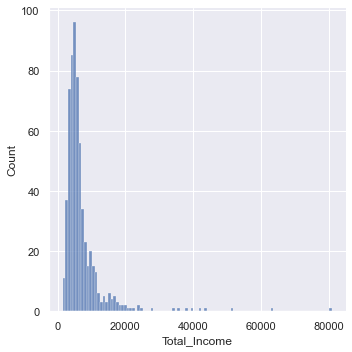

In [37]:
#Numerical data Visualisation
sn.displot(df['Total_Income'])

In [38]:
#Applying Log Transformation to reduce the skewness
df['Total_Income_log'] = np.log(df['Total_Income'])

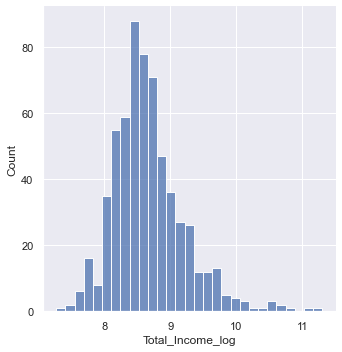

In [39]:
#Numerical data Visualisation post Transformation
sn.displot(df['Total_Income_log'])

#### Dropping insignigicant columns with less or no usefull data in it

In [40]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncome_log']
df = df.drop(columns=cols, axis=1)

In [41]:
df.head()

Gender Married Dependents     Education Self_Employed  Credit_History  \
0   Male      No          0      Graduate            No             1.0   
1   Male     Yes          1      Graduate            No             1.0   
2   Male     Yes          0      Graduate           Yes             1.0   
3   Male     Yes          0  Not Graduate            No             1.0   
4   Male      No          0      Graduate            No             1.0   

  Property_Area Loan_Status  ApplicantIncome_log  LoanAmount_log  \
0         Urban           Y             8.674026        4.986426   
1         Rural           N             8.430109        4.852030   
2         Urban           Y             8.006368        4.189655   
3         Urban           Y             7.856707        4.787492   
4         Urban           Y             8.699515        4.948760   

   Loan_Amount_Term_log  Total_Income_log  
0              5.886104          8.674026  
1              5.886104          8.714568  
2              5.886104          8.006368  
3              5.886104          8.505323  
4              5.886104          8.699515

####  Trying to Establish All the Co-relation between all columns Using HeatMap

In [42]:
#Finding Co relation for all the columns
cor =df.corr()

<AxesSubplot:>

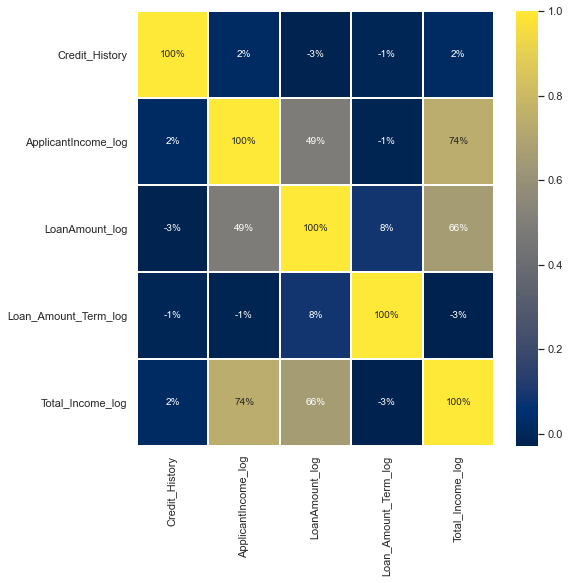

In [43]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(cor,annot=True,linewidths=1,linecolor='white',cmap="cividis",fmt='.0%')

### Label Encoding

In [44]:
cols = ['Gender', 'Married', 'Education','Self_Employed','Property_Area', 'Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [45]:
df.head()

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  Loan_Status  ApplicantIncome_log  LoanAmount_log  \
0              2            1             8.674026        4.986426   
1              0            0             8.430109        4.852030   
2              2            1             8.006368        4.189655   
3              2            1             7.856707        4.787492   
4              2            1             8.699515        4.948760   

   Loan_Amount_Term_log  Total_Income_log  
0              5.886104          8.674026  
1              5.886104          8.714568  
2              5.886104          8.006368  
3              5.886104          8.505323  
4              5.886104          8.699515

#### Data Overview Using Pandas Profiling for quick review on EDA

In [46]:
pp.ProfileReport(df)

In [47]:
df = df.round(2)
df.head()

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  Loan_Status  ApplicantIncome_log  LoanAmount_log  \
0              2            1                 8.67            4.99   
1              0            0                 8.43            4.85   
2              2            1                 8.01            4.19   
3              2            1                 7.86            4.79   
4              2            1                 8.70            4.95   

   Loan_Amount_Term_log  Total_Income_log  
0                  5.89              8.67  
1                  5.89              8.71  
2                  5.89              8.01  
3                  5.89              8.51  
4                  5.89              8.70

In [48]:
cols = ['Dependents','ApplicantIncome_log', 'LoanAmount_log','Loan_Amount_Term_log','Total_Income_log','Credit_History']
for col in cols:
    df[col] = df[col].astype('float')

In [49]:
df

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0         1        0         0.0          0              0             1.0   
1         1        1         1.0          0              0             1.0   
2         1        1         0.0          0              1             1.0   
3         1        1         0.0          1              0             1.0   
4         1        0         0.0          0              0             1.0   
..      ...      ...         ...        ...            ...             ...   
609       0        0         0.0          0              0             1.0   
610       1        1         3.0          0              0             1.0   
611       1        1         1.0          0              0             1.0   
612       1        1         2.0          0              0             1.0   
613       0        0         0.0          0              1             0.0   

     Property_Area  Loan_Status  ApplicantIncome_log  LoanAmount_log  \
0                2            1                 8.67            4.99   
1                0            0                 8.43            4.85   
2                2            1                 8.01            4.19   
3                2            1                 7.86            4.79   
4                2            1                 8.70            4.95   
..             ...          ...                  ...             ...   
609              0            1                 7.97            4.26   
610              0            1                 8.32            3.69   
611              2            1                 9.00            5.53   
612              2            1                 8.93            5.23   
613              1            0                 8.43            4.89   

     Loan_Amount_Term_log  Total_Income_log  
0                    5.89              8.67  
1                    5.89              8.71  
2                    5.89              8.01  
3                    5.89              8.51  
4                    5.89              8.70  
..                    ...               ...  
609                  5.89              7.97  
610                  5.19              8.32  
611                  5.89              9.03  
612                  5.89              8.93  
613                  5.89              8.43  

[614 rows x 12 columns]

## Input Split

In [50]:
from sklearn.model_selection import cross_val_score, train_test_split
#create x and y variables
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state =42)

In [51]:
#feature scaling
scaler = RobustScaler()
df= scaler.fit_transform(df.astype(np.float64))

### Class Imbalancement

In [52]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [53]:
#Performing Sampling to Balance the output data
from imblearn.over_sampling import SMOTE
oversample = SMOTE()##SMOTE(k_neighbours=4) if error  expected k_neighbours
# Transform the dataset
X, y = oversample.fit_resample(X, y)

In [54]:
y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

### Predicting Loan Status in Companies

In [55]:
#Classify Function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X,y):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state =42)
    
    #Train the Model
    training_start = time.perf_counter()
    model.fit(x_train,y_train)
    training_end = time.perf_counter()
    prediction_start = time.perf_counter()
    preds = model.predict(x_test)
    prediction_end = time.perf_counter()
    acc_model = (preds == y_test).sum().astype(float) / len(preds)*100
    model_train_time = training_end-training_start
    model_prediction_time = prediction_end-prediction_start
    # Cross-validation
    score = cross_val_score(model, X,y, cv=5)
    print("Accuracy:",acc_model)
    print("CV Score:",np.mean(score)*100)
    print("Difference Between Accuracy & CV Score is:",acc_model-np.mean(score)*100)
    print("Time consumed for training: %4.3f" % (model_train_time))
    print("Time consumed for prediction: %6.5f seconds" % (model_prediction_time))

In [56]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
classify(model1,X,y)

Accuracy: 69.19431279620854
CV Score: 72.39292758523528
Difference Between Accuracy & CV Score is: -3.198614789026749
Time consumed for training: 0.061
Time consumed for prediction: 0.00422 seconds


In [57]:
y_prob = model1.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model1.score(x_test, y_pred)

1.0

In [58]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[25, 29],
       [ 8, 92]], dtype=int64)

In [59]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.6914814814814815

In [60]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7655555555555555

Text(0.5, 0, 'False Positive Rate')

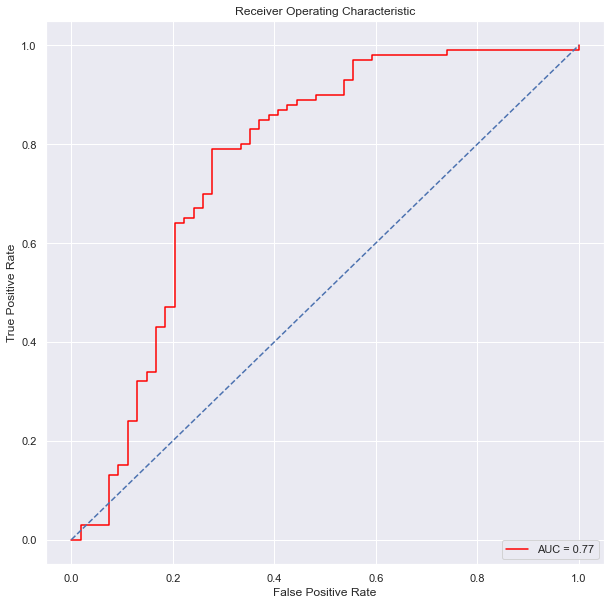

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [62]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
classify(model2,X,y)

Accuracy: 68.72037914691943
CV Score: 75.7171034094111
Difference Between Accuracy & CV Score is: -6.996724262491668
Time consumed for training: 0.007
Time consumed for prediction: 0.00393 seconds


In [63]:
y_prob = model2.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model2.score(x_test, y_pred)

1.0

In [64]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[45,  9],
       [12, 88]], dtype=int64)

In [65]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.8566666666666667

In [66]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8566666666666667

Text(0.5, 0, 'False Positive Rate')

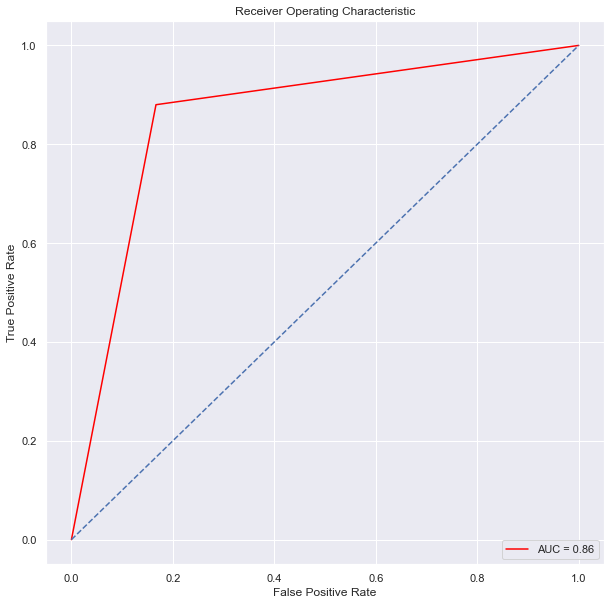

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Observtion: Auc Value is 0.8801

In [68]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
classify(model3,X,y)

Accuracy: 78.67298578199052
CV Score: 82.70569174415328
Difference Between Accuracy & CV Score is: -4.0327059621627654
Time consumed for training: 0.394
Time consumed for prediction: 0.02566 seconds


In [69]:
y_prob = model3.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model3.score(x_test, y_pred)

1.0

In [70]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[45,  9],
       [ 6, 94]], dtype=int64)

In [71]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.8866666666666667

In [72]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9375

Text(0.5, 0, 'False Positive Rate')

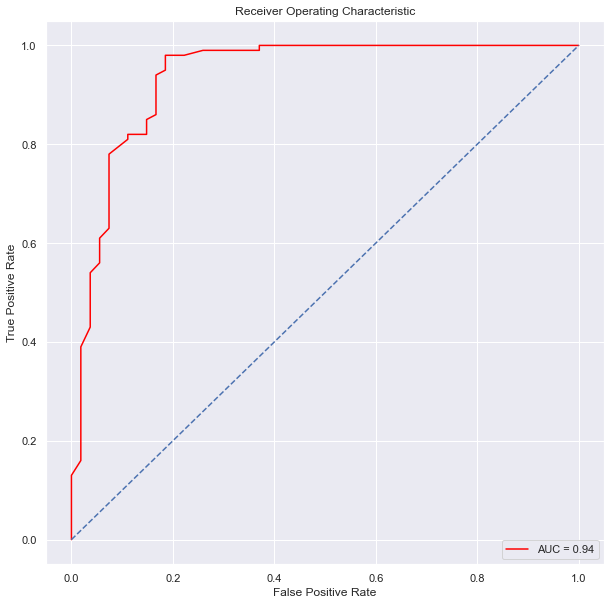

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Observtion: Auc Value is 0.9587

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
model4 = ExtraTreesClassifier()
classify(model4,X,y)

Accuracy: 75.82938388625593
CV Score: 83.53691180614258
Difference Between Accuracy & CV Score is: -7.707527919886658
Time consumed for training: 0.253
Time consumed for prediction: 0.01760 seconds


In [75]:
y_prob = model4.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model4.score(x_test, y_pred)

1.0

In [76]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[44, 10],
       [ 8, 92]], dtype=int64)

In [77]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.8674074074074074

In [78]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9579629629629629

Text(0.5, 0, 'False Positive Rate')

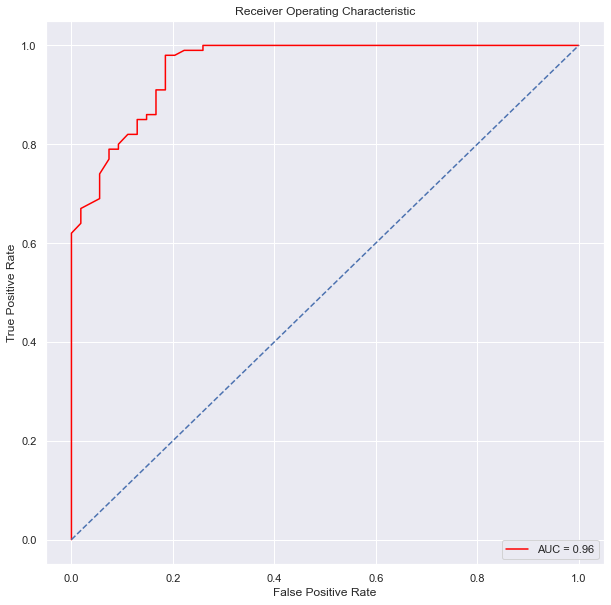

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Observtion: Auc Value is 0.9632

#### From all the above models we Choose Random Forest Model as the (Difference Between Accuracy & CV Score is: 1.54) is most Minimum in Random Forest Model and Auc Value is Highest (Auc:0.96) Compared to All other Models.

#### Hyper parameter tuning to improvise the accuracy of the model

In [80]:
#Hyper parameter tuning (Random Forest Model) to improvise the accuracy of the model
from sklearn.model_selection import GridSearchCV

In [81]:
parameter = { 'max_depth':np.arange(2,10),
               'criterion':['gini','entropy']}

In [82]:
GVC=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [83]:
GVC.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [84]:
#To find the best max_depth for the model
GVC.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [85]:
Final_mod = RandomForestClassifier(criterion= 'gini', max_depth= 9)
classify(Final_mod,X,y)

Accuracy: 76.30331753554502
CV Score: 80.33389687235841
Difference Between Accuracy & CV Score is: -4.030579336813389
Time consumed for training: 0.261
Time consumed for prediction: 0.02890 seconds


In [86]:
import pickle
  
# Save the trained model as a pickle string.
FinalModel = pickle.dumps(Final_mod)
  
# Load the pickled model
Final_mod_from_pickle = pickle.loads(FinalModel)
  
# Use the loaded pickled model to make predictions
Final_mod_from_pickle.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,

In [87]:
# extract the numerical values of feature importance from the grid search
importances = GVC.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance               feature
0     0.429056        Credit_History
1     0.138720      Total_Income_log
2     0.121094        LoanAmount_log
3     0.108707   ApplicantIncome_log
4     0.056745  Loan_Amount_Term_log
5     0.045090         Property_Area
6     0.039552            Dependents
7     0.020331               Married
8     0.014357                Gender
9     0.013831             Education
10    0.012518         Self_Employed


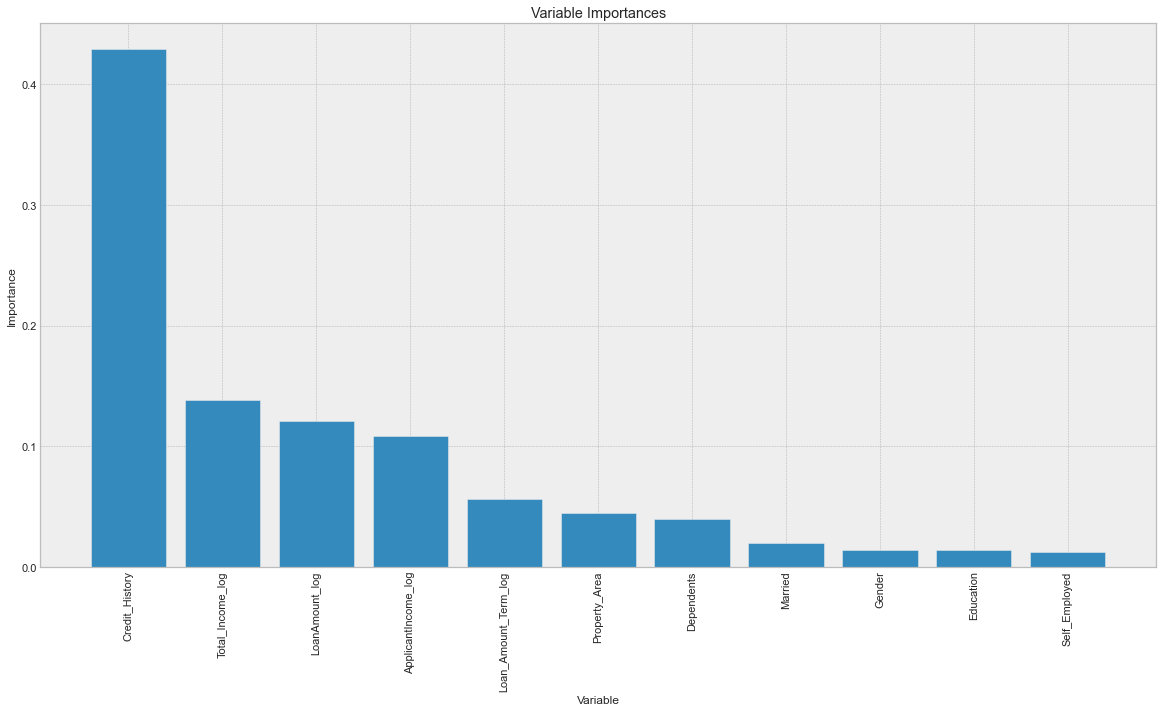

In [88]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(20,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Observation:A future aim may be to cut the less relevant features (lets say we can drop Self_Employed,Education,Gender in terms of importance),
estimate a new model and compare it with the old ones.
I reckon it would lose predictive power, but on the other hand it would improve in terms of training speed.

###### In conclusion, these are my final considerations on the model:

* The best feature to reliably predict the Loan Status in a Loan_Application is Applicants Credit history.
* The features such as Total_income_log,ApplicationIncome_log and LoanAmount_log are respectively on 2nd,3rd and 4th in this ranking. Gender is the Least relevant feature in this cluster.